# Comparing the Quality and Loess between a Full and a Half Tesla Cavity Using the EPR approach
Calculation of resonant cavity quality factors, losses, life-time and more using the EPR method. This code is based on [Ansys HFSS](https://www.ansys.com/products/electronics/ansys-hfss) and the [pyEPR library](https://github.com/zlatko-minev/pyEPR).

The cavity is half of a [Tesla cavity](https://arxiv.org/pdf/physics/0003011.pdf), this will be usefule in a later notebook where we compare the full Tesla cavity to our (half Tesla) cavity.

## Modes
| mode |  object  |
|:-----:|----------|
|   0   | transmon |
|   1   | cavity   |
|   2   | cavity   |
|   3   | cavity   |
|   4   | readout  |


#### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy = True

In [2]:
import sys
import numpy as np
from IPython.display import display, Math, Latex, display_markdown
from pathlib import Path
import pandas as pd
from scipy import constants

import pyEPR as epr
from pyEPR.calcs import Convert
from pyEPR.core import *
from pyEPR.ansys import *
import warnings
warnings.simplefilter("ignore")

In [3]:
path_to_project = 'D:\\Users\\Daniel\\Cavity-Analysis\\coupling'
# path_to_project = '.'

## 👉 Half Cavity
We start with the interesting one, the half cavity. This is the cavity we're going to be using and we want to check that it isn't that much worse than the full Tesla cavity.

### 🔷 Mode analysis

#### 🔹 Connect to HFSS

In [4]:
pinfo = epr.Project_Info(project_path = path_to_project, 
                         project_name = 'coupling',
                         design_name  = 'design')

INFO 09:44PM [connect]: Connecting to Ansys Desktop API...
INFO 09:44PM [load_ansys_project]: 	File path to HFSS project found.
INFO 09:44PM [load_ansys_project]: 	Opened Ansys App
INFO 09:44PM [load_ansys_project]: 	Opened Ansys Desktop v2020.1.0
INFO 09:44PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Users/Daniel/Cavity-Analysis/coupling/
	Project:   coupling
INFO 09:44PM [connect]: 	Opened active design
	Design:    design [Solution type: Eigenmode]
INFO 09:44PM [get_setup]: 	Opened setup `Setup1`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 09:44PM [connect]: 	Connection to Ansys established successfully. 😀 



### pad-RO gap

In [5]:
swp_var = 'ro_gap'  # Sweep ove 'ro_gap'
to_swp_val = lambda x: f'{x}mm' 

for swp_param in np.linspace(0.5, 2, 4):
    swp_val = to_swp_val(swp_param)
    epr.logger.info(f'Setting sweep variable {swp_var}={swp_val}')
    pinfo.project.set_variable(swp_var, swp_val)
    pinfo.setup.analyze()
# pinfo.setup.analyze()

INFO 09:44PM [<module>]: Setting sweep variable ro_gap=0.5mm
INFO 09:44PM [analyze]: Analyzing setup Setup1
INFO 09:44PM [<module>]: Setting sweep variable ro_gap=1.0mm
INFO 09:44PM [analyze]: Analyzing setup Setup1
INFO 09:45PM [<module>]: Setting sweep variable ro_gap=1.5mm
INFO 09:45PM [analyze]: Analyzing setup Setup1
INFO 09:46PM [<module>]: Setting sweep variable ro_gap=2.0mm
INFO 09:46PM [analyze]: Analyzing setup Setup1


In [6]:
pinfo.junctions['j1'] = {'Lj_variable' : 'Lj_1',
                         'rect'        : 'rect_jj1', 
                         'line'        : 'line_jj1', 
                         'length'      : epr.parse_units('100um')}


# Check that valid names of variables and objects have been supplied.
# An error is raised with a message if something is wrong.
pinfo.validate_junction_info()

In [7]:
eprh = epr.DistributedAnalysis(pinfo)

Design "design" info:
	# eigenmodes    5
	# variations    7


In [8]:
eprh.do_EPR_analysis(modes=[0,4]);


Variation 0  [1/7]

  Mode 0 at 4.49 GHz   [1/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               96.6%  1.302e-24 4.381e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.74%
	j1              0.964126  (+)        0.0122956
		(U_tot_cap-U_tot_ind)/mean=0.72%

  Mode 4 at 7.60 GHz   [5/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                3.0%  5.095e-23 4.944e-23

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_4j   sign s_4j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.48%
	j1              0.00842922  (+)        0.000307636
		(U_tot_cap-U_tot_ind)/mean=1.10%

Variation 1  [2/7]

  Mode 0 at 4.56 GHz   [1/5]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E  

In [9]:
epra = epr.QuantumAnalysis(eprh.data_filename)
epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 15);

	 Differences in variations:


variation,0,1,2,3,4,5,6
_$ro_gap,0.5mm,1mm,1.5mm,2mm,0.5mm,1mm,1.5mm
_ro_gap,0.5mm,1mm,1.5mm,2mm,2mm,2mm,2mm





 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.014820
4    2.311961
dtype: float64

Pm_norm idx =
      j1
0   True
4  False

*** Different parameters


_$ro_gap    0.5mm
_ro_gap     0.5mm
Name: 0, dtype: object



*** P (participation matrix, not normlz.)
         j1
0  0.952416
4  0.008427

*** S (sign-bit matrix)
   s_j1
0     1
4     1
*** P (participation matrix, normalized.)
      0.97
    0.0084

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       115      3.4
       3.4   0.0251

*** Chi matrix ND (MHz) 
       123     3.23
      3.23   0.0222

*** Frequencies O1 PT (MHz)
0    4376.239072
1    7599.526246
dtype: float64

*** Frequencies ND (MHz)
0    4372.959363
1    7599.542598
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 4]

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 1

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.015695
4    3.956376
dtype: float64

Pm_norm idx =
      j1
0   True
4  False

*** Different parameters


_$ro_gap    1mm
_ro_gap     1mm
Name: 1, dtype: object



*** P (participation matrix, not normlz.)
         j1
0  0.956536
4  0.003917

*** S (sign-bit matrix)
   s_j1
0     1
4     1
*** P (participation matrix, normalized.)
      0.97
    0.0039

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       120     1.62
      1.62  0.00544

*** Chi matrix ND (MHz) 
       128     1.53
      1.53  0.00478

*** Frequencies O1 PT (MHz)
0    4437.194074
1    7609.766145
dtype: float64

*** Frequencies ND (MHz)
0    4433.796616
1    7609.775105
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 4]

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 2

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.015655
4    6.364569
dtype: float64

Pm_norm idx =
      j1
0   True
4  False

*** Different parameters


_$ro_gap    1.5mm
_ro_gap     1.5mm
Name: 2, dtype: object



*** P (participation matrix, not normlz.)
         j1
0  0.957741
4  0.001953

*** S (sign-bit matrix)
   s_j1
0     1
4     1
*** P (participation matrix, normalized.)
      0.97
     0.002

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       120    0.805
     0.805  0.00135

*** Chi matrix ND (MHz) 
       128    0.761
     0.761  0.00119

*** Frequencies O1 PT (MHz)
0    4430.398622
1    7614.146050
dtype: float64

*** Frequencies ND (MHz)
0    4427.049027
1    7614.150419
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 4]

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 3

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0     1.015684
4    11.958356
dtype: float64

Pm_norm idx =
      j1
0   True
4  False

*** Different parameters


_$ro_gap    2mm
_ro_gap     2mm
Name: 3, dtype: object



*** P (participation matrix, not normlz.)
         j1
0  0.959634
4  0.000956

*** S (sign-bit matrix)
   s_j1
0     1
4     1
*** P (participation matrix, normalized.)
      0.97
   0.00096

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       120    0.394
     0.394 0.000324

*** Chi matrix ND (MHz) 
       128    0.373
     0.373 0.000285

*** Frequencies O1 PT (MHz)
0    4422.793687
1    7610.866029
dtype: float64

*** Frequencies ND (MHz)
0    4419.452986
1    7610.868134
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 4]

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 4

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0     1.015684
4    11.958356
dtype: float64

Pm_norm idx =
      j1
0   True
4  False

*** Different parameters


_$ro_gap    0.5mm
_ro_gap       2mm
Name: 4, dtype: object



*** P (participation matrix, not normlz.)
         j1
0  0.959634
4  0.000956

*** S (sign-bit matrix)
   s_j1
0     1
4     1
*** P (participation matrix, normalized.)
      0.97
   0.00096

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       120    0.394
     0.394 0.000324

*** Chi matrix ND (MHz) 
       128    0.373
     0.373 0.000285

*** Frequencies O1 PT (MHz)
0    4422.793687
1    7610.866029
dtype: float64

*** Frequencies ND (MHz)
0    4419.452986
1    7610.868134
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 4]

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 5

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0     1.015684
4    11.958356
dtype: float64

Pm_norm idx =
      j1
0   True
4  False

*** Different parameters


_$ro_gap    1mm
_ro_gap     2mm
Name: 5, dtype: object



*** P (participation matrix, not normlz.)
         j1
0  0.959634
4  0.000956

*** S (sign-bit matrix)
   s_j1
0     1
4     1
*** P (participation matrix, normalized.)
      0.97
   0.00096

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       120    0.394
     0.394 0.000324

*** Chi matrix ND (MHz) 
       128    0.373
     0.373 0.000285

*** Frequencies O1 PT (MHz)
0    4422.793687
1    7610.866029
dtype: float64

*** Frequencies ND (MHz)
0    4419.452986
1    7610.868134
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 4]

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 6

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0     1.015684
4    11.958356
dtype: float64

Pm_norm idx =
      j1
0   True
4  False

*** Different parameters


_$ro_gap    1.5mm
_ro_gap       2mm
Name: 6, dtype: object



*** P (participation matrix, not normlz.)
         j1
0  0.959634
4  0.000956

*** S (sign-bit matrix)
   s_j1
0     1
4     1
*** P (participation matrix, normalized.)
      0.97
   0.00096

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       120    0.394
     0.394 0.000324

*** Chi matrix ND (MHz) 
       128    0.373
     0.373 0.000285

*** Frequencies O1 PT (MHz)
0    4422.793687
1    7610.866029
dtype: float64

*** Frequencies ND (MHz)
0    4419.452986
1    7610.868134
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 4]


(<Figure size 720x432 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB62D03E80>,
       dtype=object))

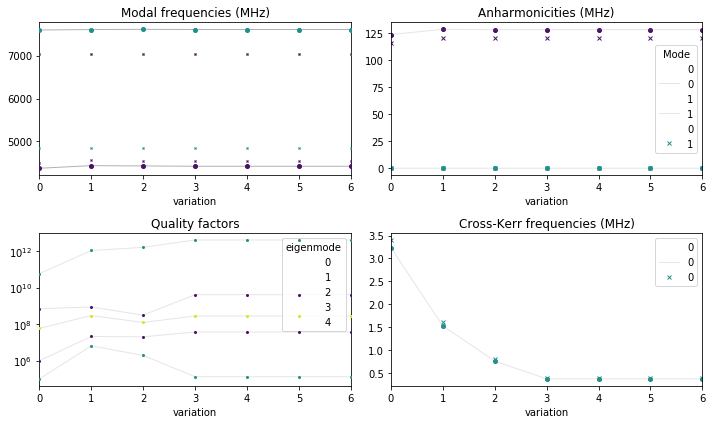

In [12]:
epra.plot_hamiltonian_results();

#### 🔹 Get HFSS mode and quality results

In [10]:
modes      = eprh.get_freqs_bare_pd(eprh.variations[0])
Fs, Qs     = np.array(modes['Freq. (GHz)']), np.array(modes['Quality Factor'])  # Get freqs and Q-factors
n_modes    = int(pinfo.setup.n_modes)
display(modes)

,Freq. (GHz),Quality Factor
mode,,
0,4.493326,9.981263e+05
1,4.849261,5.716968e+10
2,7.031634,5.873285e+07
3,7.033778,6.987834e+08
4,7.601253,1.018629e+05


#### 🔹 Calculate the EPRs of the modes

In [11]:
eprh.set_mode(0)
p_cavity, (ℰ_cav, ℰ_total) = eprh.calc_p_electric_volume('cavity')
p_dirt,  (ℰ_dirt, ℰ_total) = eprh.calc_p_electric_volume('dirt')

print(f' 🔸 Energy in cavity = {100*p_cavity:.3f}% -> {ℰ_cav:0.2e} of the total energy in the system')
print(f' 🔸 Energy in dirt   = {100*p_dirt:.3f}% -> {ℰ_dirt:0.2e} of the total energy in the system')
print(f' 🔸 Total energy     = {ℰ_total:0.2e}')

com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024365), None)

### 🔷 Life-times

**Life-time from HFSS**

Life time of a mode inside the cavity. Since in this exampole the cavity is *perfect*, the life time would be infinite

In [ ]:
Fs_Hz  = np.array(Convert.toSI(Fs,'GHz'))  # Mode freqs in Hz
omegas = 2*np.pi*Fs_Hz                     # Freqs to angular freqs
taus   = Qs/omegas                         # Life times

print(f' 🔸 Life-time of mode = {taus[0]*1e3:.3f} ms')  # Should be inf since no resistive boundry and just inside a vacuum

**Life-time from EPR**

Life time calculation with the EPR method. This is highly dependent on the loss tangent of the dirt and cavity.

In [ ]:
tan_dirt   = 4e-7                                         # Loss tangent of dirt

tau_epr    = lambda p, tan, omega: 1/(p*tan*omega)        # Easily calculate life time with EPR

tau_cavity = tau_epr(p_dirt, 0, omegas)[0]
tau_dirt   = tau_epr(p_cavity, tan_dirt, omegas)[0]

print(f' 🔸 Cavity life-time = {tau_cavity*1e6:.2f} ns')  # Should be infinite since the cavity is a pefect vacum
print(f' 🔸 Dirt life-time   = {tau_dirt*1e6:.2f} ns')

### 🔷 Losses

#### 🔹 Surface loss

Calculating the energy precentage near the cavity walls by the surface integral. The total energy of the electromagnetic field at a layer of thickness `dirt_widht` would be approximated as:
$$\text{E}_{\text{cavity, boundry}} \approx \text{dirt_width} \cdot \int_{S_{cavity}} |E|^2$$
$$\text{E}_{\text{cavity, volume}} = \int_{V_{cavity}} |E|^2$$

$$\text{EPR}_{\text{cavity, boundry}} \approx \frac{\text{E}_{\text{cavity, boundry}}}{\text{E}_{\text{cavity, volume}}}$$

First we'll setup a dictionary to store all the data

In [ ]:
data = {
    "half":{
        "volume":{
            
        },
        "surface":{
           
        }
    },
    "full":{
        "volume":{
          
        },
        "surface":{
           
        }
    }
}

In [ ]:
dirt_width = 0.1e-3
eps        = 1
tan_surf   = 5e-3

eprh.set_mode(0)

# --- Surface integral ---
surf = 'cavity'
calcobject = CalcObject([], eprh.setup)
vecE = calcobject.getQty("E").smooth()
A = vecE.times_eps()
B = vecE.conj()
A = A.dot(B)
A = A.real()
A = A.integrate_surf(name=surf)

E_subs = A.evaluate(lv=eprh._get_lv()) 
E_surf = E_subs*dirt_width*eps

# --- Volume integral ---
E_total = eprh.calc_energy_electric(smooth=True)

p_surf = E_surf/E_total      # EPR of surface 
Q_surf = 1/tan_surf/p_surf   # Q-fact of surface
tau_surf = Q_surf/omegas[0]  #  Life-time of surface

data['half']['surface'] = {
    "EPR": p_surf,
    "Q":   Q_surf,
    "tau":  tau_surf
}

print(f' 🔸 EPR surface       = {100*p_surf:.2f}%')
print(f' 🔸 Q-factor surface  = {Q_surf:.2e}')
print(f' 🔸 Life-time surface = {tau_surf:.2e} seconds \n')


#### 🔹 Dirt (volume) loss

In [ ]:
# Dirt is simulated as much thicker than it actually is (for computation reason). 
# Beacuase of that we reduce the loss tangent to an 'effective loss tangent' which is loss_tan*thick_factor
p_dirt, (ℰ_dirt, ℰ_total) = eprh.calc_p_electric_volume('dirt')
Q_dirt = 1/(tan_surf*p_dirt)
tau_dirt = Q_dirt/omegas[0]

data['half']['volume'] = {
    "EPR": p_dirt,
    "Q":   Q_dirt,
    "tau": tau_dirt
}

print(f'  🔸 EPR of dirt    = {100*p_dirt:0.2f}% ( {ℰ_dirt:.2e} / {ℰ_total:.2e} )')
print(f'  🔸 Quality factor = {Q_dirt:0.2e}')
print(f'  🔸 life time      = {tau_dirt:0.2e} seconds\n')

### Figure what which mode is which

In [ ]:
Es = []
for i in range(int(pinfo.setup.n_modes)):
    eprh.set_mode(i)

    calcobject = CalcObject([], eprh.setup)
    vecE   = calcobject.getQty("E").smooth()
    A      = vecE.times_eps()
    B      = vecE.conj()
    A      = A.dot(B)
    A      = A.real()
    ro     = A.integrate_surf(name='readout')
    cav    = A.integrate_vol(name='cavity')
    pad1   = A.integrate_surf(name='pad')
    pad2   = A.integrate_surf(name='pad_antenna')
    
    E_ro   = ro.evaluate(lv=eprh._get_lv()) 
    E_cav  = cav.evaluate(lv=eprh._get_lv()) 
    E_pad1 = pad1.evaluate(lv=eprh._get_lv()) 
    E_pad2 = pad2.evaluate(lv=eprh._get_lv()) 
    
    E = np.array([E_ro, E_cav, E_pad1, E_pad2])
    names = ['readout', 'cavity', 'transmon/pad', 'transmon/pad+antenna']
    print(i, ' --> ', names[np.argmax(E)])